In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
execute_data = pd.read_csv(url)
print("Data imported successfully")
execute_data.head(25)


Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


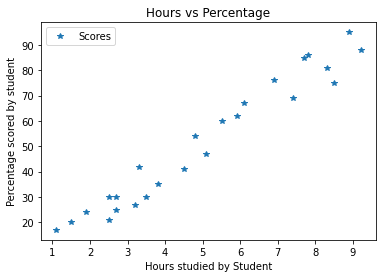

In [7]:
#plotting the distribution of scores of given data
execute_data.plot(x="Hours",y="Scores",style='*')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied by Student')
plt.ylabel('Percentage scored by student')
plt.show()

In [8]:
#it return a series containing count of unique values of hours
execute_data.Hours.value_counts()

2.7    2
2.5    2
5.1    1
3.3    1
6.9    1
3.2    1
6.1    1
7.4    1
7.8    1
8.3    1
4.5    1
7.7    1
1.1    1
3.8    1
3.5    1
8.9    1
1.9    1
5.9    1
4.8    1
8.5    1
5.5    1
9.2    1
1.5    1
Name: Hours, dtype: int64

In [9]:
#it return a series containing count of unique values of hours
execute_data.Scores.value_counts()

30    3
35    1
20    1
24    1
60    1
27    1
17    1
25    1
88    1
54    1
21    1
85    1
67    1
81    1
47    1
62    1
75    1
42    1
41    1
86    1
69    1
76    1
95    1
Name: Scores, dtype: int64

In [10]:
#to check if there is any missing values in our dataset
execute_data.isna().sum().sum()

0

In [11]:
#used to find the data types 
execute_data.dtypes

Hours     float64
Scores      int64
dtype: object

In [12]:
#to find the mean and median value
print("Mean Value of Hours {}".format(execute_data.Hours.mean()))
print("Median Value of Hours {}".format(execute_data.Hours.median()))

Mean Value of Hours 5.012
Median Value of Hours 4.8


In [14]:
#training the data in the dataframe
X = execute_data.iloc[:, :-1].values
Y = execute_data.iloc[:, -1].values

In [17]:
#train_test is a split function in SKlearn model selection for splitting data
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,
                                                  test_size = 0.8, random_state = 3)

In [18]:
#training the Algorithm
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor. fit(X_train, Y_train)
print("Training is done")

Training is done


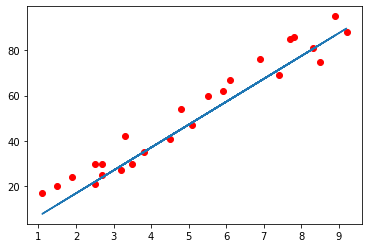

In [19]:
#Plotting the regressor line for the given data
line = regressor.coef_*X+regressor.intercept_

#plotting as per test date
plt.scatter(X,Y,color='r')
plt.plot(X,line)
plt.show()

In [25]:
#making prediction testing data in hours
print(X_test)
#predicting the score
Y_Prediction = regressor.predict(X_test)

[[6.1]
 [1.9]
 [4.5]
 [6.9]
 [8.9]
 [2.5]
 [3.3]
 [3.2]
 [5.1]
 [3.8]
 [1.1]
 [3.5]
 [4.8]
 [9.2]
 [5.5]
 [1.5]
 [2.7]
 [2.7]
 [5.9]
 [7.8]]


In [26]:
#comparing the actual data vs the predicted value
df = pd.DataFrame({"Actual Value":Y_test, "Predicted Value":Y_Prediction})
df

,Actual Value,Predicted Value
0,67,58.323159
1,24,15.909399
2,41,42.165536
3,76,66.401970
4,95,86.598999
5,30,21.968508
6,42,30.047319
7,27,29.037468
8,47,48.224645
9,35,35.096576


In [27]:
x = execute_data.iloc[:, :-1].values
y = execute_data.iloc[:, -1].values

In [29]:
#testing data 
Hours= 9.5
predicted_score = regressor.predict([[Hours]])
print(f"Number of Hours={Hours}")
print(f"Predicted Scores = {predicted_score}")

Number of Hours=9.5
Predicted Scores = [92.65810724]


In [30]:
#evaluating the model 
from sklearn import metrics
print("Mean Absolute Error of the value is", metrics.mean_absolute_error(Y_test, Y_Prediction))
print("Median Absolute Error of the value is",metrics.median_absolute_error(Y_test, Y_Prediction))

Mean Absolute Error of the value is 6.002010658914736
Median Absolute Error of the value is 7.883720930232576
